# Homework - Part 1 - Naive Bayes

# Naive Bayes

## Spam detector for SMS messages

We will use Naive Bayes method to calssify SMS messages as spam or ham (i.e., non-spam). To that end, we will use three libraries:
1. skllearn - for Naive Bayes
2. pandas - for data handling
3. nltk - for manipulation of text



## 1. Loading data

The SMS Spam Collection contains 5,572 messages, tagged according being ham (legitimate) or spam. 
The dataset has the format [label] [tab] [message], which looks something like this:

ham &emsp; Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... <br>
ham &emsp; Ok lar... Joking wif u oni... <br>
ham	&emsp; U dun say so early hor... U c already then say...

In [3]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection', 
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2. Data Preprocessing

### Exercise:
Do the following:
1. Change the labels of ham into 0 and spam into 1
2. Convert all messages to lower case
3. Find the distribution of messages. Namely, how many spam and how many ham SMS messages there are. What is their percetage of total messages?

### Solution:

In [5]:
# Part 1 - change ham to 0 and spam to 1

df['label'] = df['label'].map({'ham':0, 'spam':1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Part 2:  Convert to lower case

df['message'] = df['message'].str.lower()
df.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [10]:
# Part 3 - number of SMS messages of each type

ham_counter = df['label'].value_counts()[0]
spam_counter = df['label'].value_counts()[1]
total_counter = df['label'].count()

print("There are", ham_counter, "Ham messages, and it is %.3f%% of total messages" % (ham_counter/total_counter*100))
print("There are", spam_counter, "Spam messages, and it is %.3f%% of total messages" % (spam_counter/total_counter*100))


There are 4825 Ham messages, and it is 86.594% of total messages
There are 747 Spam messages, and it is 13.406% of total messages


In [11]:
# part 4 - provided free of charge. 
# removinhg punctuation

#df['message'] = df['message'].str.strip()
df['message'] = df.message.str.replace('[^\w\s]', '')  # option 2
df.head()

C:\Users\royef\AppData\Local\Temp\ipykernel_21784\208824974.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df.message.str.replace('[^\w\s]', '')  # option 2


,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


## 3. Data preprocessing using nltk package

nltk - natural language toolkit package is a package that processes text. We will use it to separate words and use their counts.

But first, let's see how this works

### nltk example

In [12]:
import nltk

In [13]:
nltk.download('punkt') # - in case stuff is missing/not working

# break sentence into tokens (words)
sentence = 'At eight o\'clock on Thursday morning Arthur didn\'t feel very good '
tokens = nltk.word_tokenize(sentence)
tokens



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\royef\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good']

In [14]:
# Remove tenses and conjugations of words
from nltk.stem import PorterStemmer

ps = PorterStemmer()   # this is a particular algoirthm


example_words = ["python","pythoner","pythoning","pythoned", "pythoned", "pythonly", "pythonant"]
for w in example_words:
    print(ps.stem(w))    
    

python
python
python
python
python
pythonli
python


In [15]:
text = "It is important to be very pythonly while you are pythoning with python. \
            All pythoners have pythoned poorly at least once."

words = nltk.word_tokenize(text)
new_text = []
for w in words:
    #print(ps.stem(w))
    new_text.append(ps.stem(w))
    
print (' '.join(new_text))

it is import to be veri pythonli while you are python with python . all python have python poorli at least onc .


### Back to SMS messages

Separating messages into words - i.e., tokenizing

In [16]:
df2 = df.copy()
df2['message'] = df2['message'].apply(nltk.word_tokenize)  

# NOTE: using df2, because otherwise you can't run this twice. 
# word_tokenize takes as argument a string, and after this is done,
# the contents of df['message'] is a list

In [17]:
df2.head()

,label,message
0,0,"[go, until, jurong, point, crazy, available, o..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"[nah, i, dont, think, he, goes, to, usf, he, l..."


Applying Porter Stemmer to the words of each message

In [18]:
df2['message'] = df2['message'].apply(lambda x: [ps.stem(y) for y in x])

In [19]:
df2.head()

,label,message
0,0,"[go, until, jurong, point, crazi, avail, onli,..."
1,0,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,0,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,0,"[nah, i, dont, think, he, goe, to, usf, he, li..."


## 4.  Data Preprocessing using sklearn

### Counting words - example first

Convert a collection of text documents to a matrix of token counts

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
text_collection = ['This is the first document.',
                   'This document is the second document.',
                   'And this is the third one.',
                   'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_collection) # vocabulary dictionary of all tokens in documents, aka: features

print(vectorizer.get_feature_names_out())   # prints the distinct words
print ()

print (X)           # first index - line of text
                    # secobd index - index of feature that appears in the line. 
                    # second index is oredered by features array not by order in which they appear in the line 
print ()
print(X.toarray())  # Each row of the matrix indicates which features appear in the correspoding line 
                    # (order is not preserved, of course). For example, in row 2, the seond value is 2, 
                    # which means that the feature 'document' appears twice in the second line. As is the case

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### Word count per message on df2

In [21]:
# This converts the list of words into space-separated strings - so we're back to a phrase for each message 
df3 = df2.copy()
df3['message'] = df3['message'].apply(lambda x: ' '.join(x))
df3.head()

,label,message
0,0,go until jurong point crazi avail onli in bugi...
1,0,ok lar joke wif u oni
2,1,free entri in 2 a wkli comp to win fa cup fina...
3,0,u dun say so earli hor u c alreadi then say
4,0,nah i dont think he goe to usf he live around ...


In [22]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df3['message'])

In [23]:
print (count_vect.get_feature_names_out())

['008704050406' '0089mi' '0121' ... 'zouk' 'zyada' 'üll']


In [24]:
print (counts)  

  (0, 3336)	1
  (0, 7497)	1
  (0, 4128)	1
  (0, 5635)	1
  (0, 2248)	1
  (0, 1340)	1
  (0, 5292)	1
  (0, 3872)	1
  (0, 1750)	1
  (0, 3425)	1
  (0, 7925)	1
  (0, 4273)	1
  (0, 1748)	1
  (0, 2029)	1
  (0, 7130)	1
  (0, 3388)	1
  (0, 1146)	1
  (0, 7715)	1
  (1, 5257)	1
  (1, 4308)	1
  (1, 4094)	1
  (1, 7835)	1
  (1, 5289)	1
  (2, 3872)	1
  (2, 3148)	1
  :	:
  (5570, 7754)	1
  (5570, 1160)	1
  (5570, 3823)	1
  (5570, 4396)	1
  (5570, 6587)	1
  (5570, 3105)	1
  (5570, 7109)	1
  (5570, 1463)	1
  (5570, 5048)	1
  (5570, 2492)	1
  (5570, 7534)	1
  (5570, 1773)	1
  (5570, 6596)	1
  (5570, 1777)	1
  (5570, 2760)	1
  (5570, 3255)	1
  (5570, 3477)	1
  (5570, 3940)	1
  (5570, 983)	1
  (5570, 1563)	1
  (5571, 7236)	1
  (5571, 3987)	2
  (5571, 4970)	1
  (5571, 7366)	1
  (5571, 6114)	1


 Observe that first index runs until 5571, because there 5572 messages

In [25]:
print(counts.toarray())  # this is a very sparse matrix

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print (counts.shape)
#print (counts[0,7191])

print (counts) 

(5572, 8169)
  (0, 3336)	1
  (0, 7497)	1
  (0, 4128)	1
  (0, 5635)	1
  (0, 2248)	1
  (0, 1340)	1
  (0, 5292)	1
  (0, 3872)	1
  (0, 1750)	1
  (0, 3425)	1
  (0, 7925)	1
  (0, 4273)	1
  (0, 1748)	1
  (0, 2029)	1
  (0, 7130)	1
  (0, 3388)	1
  (0, 1146)	1
  (0, 7715)	1
  (1, 5257)	1
  (1, 4308)	1
  (1, 4094)	1
  (1, 7835)	1
  (1, 5289)	1
  (2, 3872)	1
  (2, 3148)	1
  :	:
  (5570, 7754)	1
  (5570, 1160)	1
  (5570, 3823)	1
  (5570, 4396)	1
  (5570, 6587)	1
  (5570, 3105)	1
  (5570, 7109)	1
  (5570, 1463)	1
  (5570, 5048)	1
  (5570, 2492)	1
  (5570, 7534)	1
  (5570, 1773)	1
  (5570, 6596)	1
  (5570, 1777)	1
  (5570, 2760)	1
  (5570, 3255)	1
  (5570, 3477)	1
  (5570, 3940)	1
  (5570, 983)	1
  (5570, 1563)	1
  (5571, 7236)	1
  (5571, 3987)	2
  (5571, 4970)	1
  (5571, 7366)	1
  (5571, 6114)	1


## 5. Training the model

In [28]:
from sklearn.model_selection import train_test_split

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.1, random_state=120)

print (X_train.shape)   # each row has 7536 features (all possible words) 
print (y_train.shape)   # recall, label is ham or spam (1 or 0)
print (X_test.shape)



(5014, 8169)
(5014,)
(558, 8169)


Initialize a Naive Bayes Classifier and fit the data. For text classification problems, the Multinomial Naive Bayes Classifier is well-suited.

In [29]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

## 6. Evaluating the Model


In [30]:
import numpy as np

y_test_pred = model.predict(X_test)
print('Model accuracy on test set: %.1f%%' % (100*np.mean(y_test_pred == y_test)))

Model accuracy on test set: 97.8%


The Naive Bayes Classifier has 98.2% accuracy on this specific test set. Is this good? Well, maybe... 

The data is skewed. 86.6% is ham and 13.4% is spam. So a really dumb classifier that classifies all messages as ham would have a 86.6% accuracy. 

# Exercise:

1. Print the confusion matrix
2. What are the precision and recall and F1 scores?
3. Plot ROC, and calculate AUC
4. What is your conclusion?

# Solution:

In [31]:
from sklearn.metrics import confusion_matrix

#Confusion matrix
x = confusion_matrix(y_test, y_test_pred)
pd.DataFrame(x, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
True 0,459,9
True 1,3,87


In [32]:
from sklearn.metrics import precision_score

#calculate Precision using sklearn
precision_sklearn = precision_score(y_test, y_test_pred)

print('Precision by sklearn:', format(precision_sklearn,'.3%'))

#calculate Precision using formula
tp = np.sum((y_test == 1) & (y_test_pred == 1))
fp = np.sum((y_test == 0) & (y_test_pred == 1))
precision_formula = tp / (tp + fp)

print('Precision by formula:', format(precision_formula,'.3%'))

Precision by sklearn: 90.625%
Precision by formula: 90.625%


In [33]:
from sklearn.metrics import recall_score

#calculate recall using sklearn
recall_sklearn = recall_score(y_test, y_test_pred)

print('Recall by sklearn:', format(recall_sklearn,'.3%'))

#calculate recall using formula
tp = np.sum((y_test == 1) & (y_test_pred == 1))
fn = np.sum((y_test == 1) & (y_test_pred == 0))
recall_formula = tp / (tp + fn)

print('Recall by formula:', format(recall_formula,'.3%'))

Recall by sklearn: 96.667%
Recall by formula: 96.667%


In [41]:
from sklearn.metrics import f1_score

#calculate F1 score using sklearn
f1_sklearn = f1_score(y_test, y_test_pred)
print('F1 score by sklearn:', format(f1_sklearn,'.3%'))

# calculate F1 score using formula
f1_formula = 2 * (precision_formula * recall_formula) / (precision_formula + recall_formula)

print('F1 score by formula:', format(f1_formula,'.3%'))

F1 score by sklearn: 93.548%
F1 score by formula: 93.548%


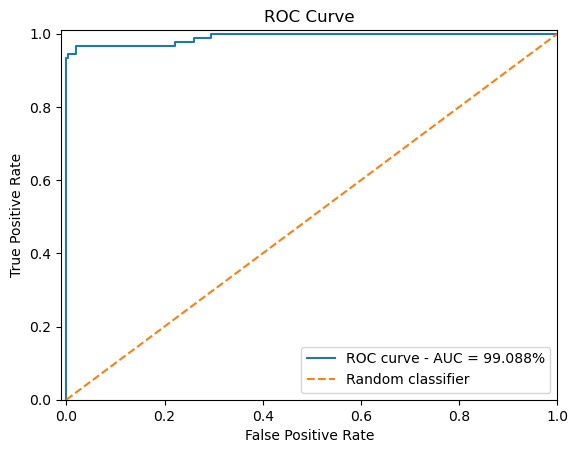

In [48]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Predicted probabilities for ROC 
y_prob_both = model.predict_proba(X_test)
y_prob_spam = y_prob_both[: , 1]

#Compute the FPR, TPR, and threshold values 
fpr, tpr, thresholds = roc_curve(y_test, y_prob_spam)

# Compute the AUC score
auc = auc(fpr,tpr)

#Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve - AUC = %.3f%%' % (auc*100))

#Plot the ROC curve for the random classifier
plt.plot([0, 1], [0, 1], '--',label='Random classifier') 

#Set the x and y axis limits
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## My conclusion 
- Based on the evaluation metrics, I can conclude that the model is performing well in predicting ham and spam SMS messages. The precision of 90.625% indicates that when the model predicts a message as spam, it is correct 90.625% of the time. The recall of 96.667% suggests that the model is able to correctly identify 96.667% of all spam messages.


- The F1 score of 93.548% is a balanced measure of precision and recall, and indicates that the model has a good overall performance. The ROC curve and AUC score of 99.088% also support the conclusion that the model has high discriminatory power in distinguishing between ham and spam messages.


- However, it's important to note that the dataset has a class imbalance, with 86.2% of the messages labeled as 'ham'. This may affect the model's performance and the evaluation metrics should be interpreted with caution. It's important to evaluate the model on multiple datasets and using different evaluation metrics to get a more comprehensive understanding of its performance.